# AML Project - Group 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Spotify_Youtube.csv")

## Data Cleaning

In [4]:
df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [5]:
df2 = df.dropna()

In [6]:
df2.shape

(19170, 28)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19170 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        19170 non-null  int64  
 1   Artist            19170 non-null  object 
 2   Url_spotify       19170 non-null  object 
 3   Track             19170 non-null  object 
 4   Album             19170 non-null  object 
 5   Album_type        19170 non-null  object 
 6   Uri               19170 non-null  object 
 7   Danceability      19170 non-null  float64
 8   Energy            19170 non-null  float64
 9   Key               19170 non-null  float64
 10  Loudness          19170 non-null  float64
 11  Speechiness       19170 non-null  float64
 12  Acousticness      19170 non-null  float64
 13  Instrumentalness  19170 non-null  float64
 14  Liveness          19170 non-null  float64
 15  Valence           19170 non-null  float64
 16  Tempo             19170 non-null  float6

In [8]:
df2.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04
mean,10434.934637,0.621178,0.636150,5.292645,-7.615305,0.094944,0.287817,0.055476,0.191322,0.528267,120.607345,2.247612e+05,9.719768e+07,6.823531e+05,2.838656e+04,1.382746e+08
std,5989.698716,0.165533,0.213439,3.579947,4.617605,0.104931,0.285630,0.192768,0.165217,0.244996,29.588308,1.278468e+05,2.799997e+08,1.820550e+06,1.977979e+05,2.477309e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,5240.500000,0.520000,0.510000,2.000000,-8.745000,0.035700,0.043600,0.000000,0.094100,0.338000,96.997500,1.802670e+05,2.070213e+06,2.447350e+04,5.830000e+02,1.786937e+07
50%,10500.500000,0.639000,0.667000,5.000000,-6.504000,0.050600,0.188000,0.000002,0.125000,0.535000,119.969000,2.133210e+05,1.568959e+07,1.332770e+05,3.515500e+03,5.037938e+07
75%,15640.750000,0.742000,0.798000,8.000000,-4.918500,0.104000,0.469000,0.000436,0.234000,0.724000,139.946000,2.519630e+05,7.369040e+07,5.423462e+05,1.494100e+04,1.407579e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


## Exploratory Data Analysis

<AxesSubplot:xlabel='Stream'>

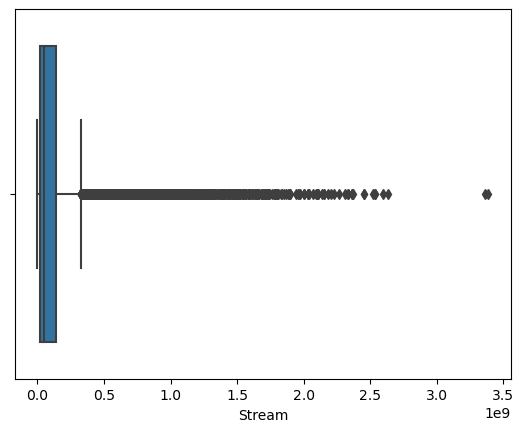

In [9]:
sns.boxplot(df2['Stream']) #actual data of stream variable is right-skewed

<AxesSubplot:xlabel='log_Stream'>

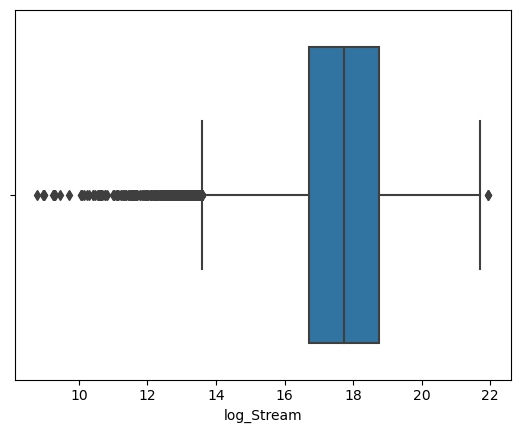

In [10]:
 #log transformation of Stream variable
df2["log_Stream"] = np.log(df2["Stream"])
sns.boxplot(df2["log_Stream"])

In [11]:
# Outliers Detection
q1, q3 = np.percentile(df2['log_Stream'], [25, 75])
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
outliers = df2[(df2['log_Stream'] < ll) | (df2['log_Stream'] > ul)]
outliers.shape

(299, 29)

In [12]:
cond = df2['Unnamed: 0'].isin(outliers['Unnamed: 0'])
df2.drop(df2[cond].index, inplace = True)
df2.shape

(18871, 29)

In [13]:
# Top 20 artists grouped by streams/views
Top20_Spotify = pd.DataFrame(df2.groupby(['Artist'])['Stream'].sum().sort_values(ascending = False)).head(20)
Top20_YT = pd.DataFrame(df2.groupby(['Artist'])['Views'].sum().sort_values(ascending = False)).head(20)

In [14]:
#Add index column for top 20
Top20_Spotify = Top20_Spotify.reset_index()
Top20_YT = Top20_YT.reset_index()

Text(0.5, 1.0, 'Top 20 Artists on Spotify')

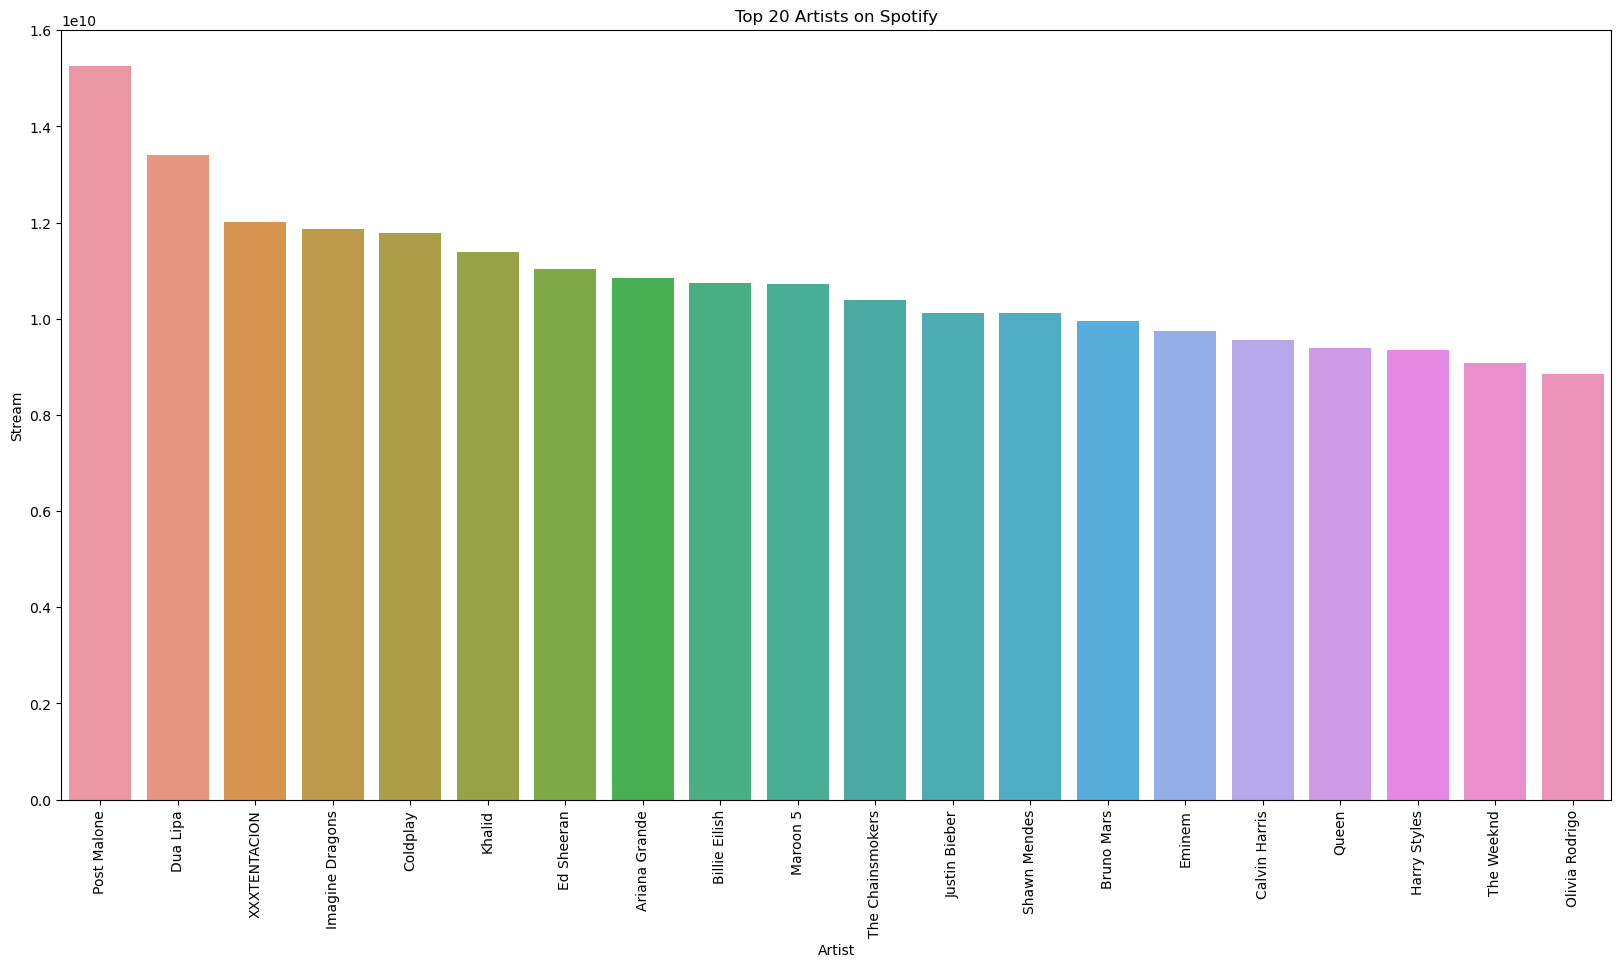

In [15]:
#Vertical bar graph of top Spotify artists
plt.figure(figsize = [20,10])
sns.barplot(x = Top20_Spotify['Artist'] , y = Top20_Spotify['Stream'])
plt.xticks(rotation = 90)
plt.title("Top 20 Artists on Spotify")

## Model Building

In [16]:
#Streams = Loudness, Danceability, Key, Speechness, Instrumentalness, Liveliness, Valence, Tempo, Duration_MS, Likes, Licensed,
#          Artist, Stream, Album Type, Views, Comments, Acousticness, Energy

In [17]:
model_data = df2[['Loudness' , 'Danceability', 'Key','Speechiness' ,'Instrumentalness' , 'Liveness',
                 'Valence', 'Tempo' , 'Duration_ms', 'Likes', 'Licensed', 'log_Stream',
                 'Album_type', 'Views' , 'Comments', 'Acousticness', 'Energy']]

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_table = model_data.drop(columns = ['Licensed' , 'log_Stream', 'Album_type'])
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_table.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_table.values, i)
                          for i in range(len(vif_table.columns))]
vif_data

,feature,VIF
0,Loudness,7.336951
1,Danceability,16.578484
2,Key,3.152742
3,Speechiness,2.133395
4,Instrumentalness,1.691045
5,Liveness,2.474909
6,Valence,8.342606
7,Tempo,14.964459
8,Duration_ms,3.950475
9,Likes,8.833829


In [19]:
#Drop columns with high multicollinearity
data = model_data.drop(columns = ['Energy','Danceability'])

In [21]:
#Add new VIF table with variables removed
vif_table = model_data.drop(columns = ['Licensed' , 'log_Stream', 'Album_type', 'Energy', 'Danceability', 'Tempo'])
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_table.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_table.values, i)
                          for i in range(len(vif_table.columns))]
vif_data

,feature,VIF
0,Loudness,5.938327
1,Key,2.902789
2,Speechiness,1.905566
3,Instrumentalness,1.609541
4,Liveness,2.175212
5,Valence,4.033210
6,Duration_ms,3.343645
7,Likes,8.703631
8,Views,6.348288
9,Comments,1.977493


In [26]:
df2['Album_type'].unique() #types of albums

array(['album', 'single', 'compilation'], dtype=object)

In [27]:
#creating dummies for categorical variable
reg_data = data.copy()
reg_data['Single'] = np.where(reg_data['Album_type'] == 'single' , 1, 0)
reg_data['Compilation'] = np.where(reg_data['Album_type'] == 'compilation' , 1, 0)
reg_data['Licensed'] = reg_data['Licensed'].astype("int32")

In [28]:
reg_data.describe() #check for log_Stream

,Loudness,Key,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Likes,Licensed,log_Stream,Views,Comments,Acousticness,Single,Compilation
count,18871.000000,18871.000000,18871.000000,18871.000000,18871.000000,18871.000000,18871.000000,1.887100e+04,1.887100e+04,18871.000000,18871.000000,1.887100e+04,1.887100e+04,18871.000000,18871.000000,18871.000000
mean,-7.592294,5.296805,0.092228,0.055299,0.190724,0.527893,120.664460,2.251263e+05,6.899184e+05,0.716284,17.737998,9.827577e+07,2.872200e+04,0.287679,0.239309,0.035716
std,4.598882,3.578661,0.094483,0.192591,0.164558,0.245175,29.558019,1.285820e+05,1.817146e+06,0.450812,1.508780,2.786136e+08,1.991442e+05,0.285578,0.426673,0.185587
min,-46.251000,0.000000,0.000000,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000,13.603403,2.600000e+01,0.000000e+00,0.000001,0.000000,0.000000
25%,-8.707000,2.000000,0.035600,0.000000,0.094100,0.337500,97.011000,1.804350e+05,2.732650e+04,0.000000,16.753855,2.307146e+06,6.400000e+02,0.043600,0.000000,0.000000
50%,-6.490000,5.000000,0.050400,0.000002,0.125000,0.534000,119.972000,2.135940e+05,1.392880e+05,1.000000,17.767609,1.638388e+07,3.674000e+03,0.188000,0.000000,0.000000
75%,-4.913000,8.000000,0.103000,0.000432,0.233000,0.724000,139.953000,2.522290e+05,5.562725e+05,1.000000,18.779292,7.483926e+07,1.519750e+04,0.469000,0.000000,0.000000
max,0.920000,11.000000,0.935000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,5.078865e+07,1.000000,21.691775,8.079649e+09,1.608314e+07,0.996000,1.000000,1.000000


In [29]:
# Drop categorical & dependent variables before assigning X & y
X = reg_data.drop(columns = ["log_Stream", 'Album_type'])
y = reg_data['log_Stream']

In [30]:
# Data scaling to Normal Distribution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_trans)

In [31]:
#Split data & train 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=0)

In [32]:
X_train.shape[0], X_test.shape[0] #13209 rows in training, 5662 rows in testing

(13209, 5662)

In [33]:
# Lin Reg Model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Check which to use: OLS or normal lin reg?

# If the assumptions of OLS regression are met, it can provide a simpler and more straightforward approach to predicting song popularity on Spotify.
# However, if the data violate the assumptions of OLS regression or if the analysis requires more advanced techniques, normal linear regression may be a better choice. 
# Ultimately, the choice between these methods should be based on a careful evaluation of the data and the research questions

#reason to include both models
#Exploration of different methods, showing we evaluated the assumptions and limitations of each model
#help us understand the strengths and weaknesses of each method in predicting song popularity on Spotify

In [35]:
# Coefficients & Intercept
lr_model.coef_,lr_model.intercept_

(array([ 0.12764813, -0.00364728, -0.04967239, -0.09597324, -0.07104843,
        -0.07464104,  0.01588235, -0.0194094 ,  0.96154547,  0.03269481,
        -0.13023174, -0.41773802, -0.07990119, -0.29311124, -0.03664781]),
 17.73649460081798)

In [36]:
#Prediction values
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)
y_pred_test.shape, y_pred_test

((5662,),
 array([17.58430647, 17.07233251, 17.19055565, ..., 17.45841839,
        17.25918897, 17.61059908]))

In [37]:
# Evaluation MAE for testing data
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_test)

1.0555018172045392

In [38]:
# R^2 value for training & testing data
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)

(0.2611611682030637, 0.22343275429341014)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18871 entries, 0 to 20717
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loudness          18871 non-null  float64
 1   Key               18871 non-null  float64
 2   Speechiness       18871 non-null  float64
 3   Instrumentalness  18871 non-null  float64
 4   Liveness          18871 non-null  float64
 5   Valence           18871 non-null  float64
 6   Tempo             18871 non-null  float64
 7   Duration_ms       18871 non-null  float64
 8   Likes             18871 non-null  float64
 9   Licensed          18871 non-null  int32  
 10  Views             18871 non-null  float64
 11  Comments          18871 non-null  float64
 12  Acousticness      18871 non-null  float64
 13  Single            18871 non-null  int32  
 14  Compilation       18871 non-null  int32  
dtypes: float64(12), int32(3)
memory usage: 2.1 MB


In [40]:
#P-values for linear Regression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     433.0
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:07:55   Log-Likelihood:                -31745.
No. Observations:               18871   AIC:                         6.352e+04
Df Residuals:                   18855   BIC:                         6.365e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               18.1648      0.062  

In [41]:
#P-values for modified linear Regression
import statsmodels.api as sm
from scipy import stats
X1 = X.drop(columns = ['Key' , 'Tempo','Duration_ms'])
X2 = sm.add_constant(X1)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     540.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:07:58   Log-Likelihood:                -31748.
No. Observations:               18871   AIC:                         6.352e+04
Df Residuals:                   18858   BIC:                         6.362e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               18.1811      0.042  

In [42]:
# Ridge Regression Model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

y_pred_test_ridge = ridge_reg.predict(X_test)

y_pred_test_ridge

array([17.58433853, 17.07241133, 17.19061258, ..., 17.45840572,
       17.25927916, 17.61067171])

In [43]:
from sklearn.model_selection import GridSearchCV
param_ridge = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10]}

# Define function and fit the data
grid_ridge = Ridge()
grid_ridge_est = GridSearchCV(grid_ridge, param_ridge, cv=5)

grid_ridge_est.fit(X_train, y_train)

# Present performance measure, find best hyperparameters, and find best parameter estimates
grid_ridge_est.best_params_, grid_ridge_est.best_score_, grid_ridge_est.cv_results_

({'alpha': 1e-05},
 0.2573919461658951,
 {'mean_fit_time': array([0.00604014, 0.00647225, 0.00475082, 0.00040412, 0.00640936,
         0.00613141]),
  'std_fit_time': array([0.00222931, 0.00666111, 0.00439872, 0.00080824, 0.0078534 ,
         0.00751205]),
  'mean_score_time': array([0.00113034, 0.00079956, 0.        , 0.00282393, 0.        ,
         0.        ]),
  'std_score_time': array([0.00106315, 0.00039979, 0.        , 0.00564785, 0.        ,
         0.        ]),
  'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 1, 10],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'alpha': 1e-05},
   {'alpha': 0.0001},
   {'alpha': 0.001},
   {'alpha': 0.01},
   {'alpha': 1},
   {'alpha': 10}],
  'split0_test_score': array([0.26253722, 0.26253722, 0.26253721, 0.2625372 , 0.26253585,
         0.26252012]),
  'split1_test_score': array([0.27046984, 0.27046984, 0.27046984, 0.27046986, 0.27047195,

In [44]:
grid_ridge_est.score(X_train, y_train), grid_ridge_est.score(X_test, y_test) #R^2 value for testing data

(0.2611611682030637, 0.22343275511634553)

In [45]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)
regr_dt = DecisionTreeRegressor(max_depth=4)
regr_dt.fit(X_train1, y_train1)
y_pred_dt = regr_dt.predict(X_test1)
r2_score(y_test1, y_pred_dt)

0.4310029437625663

[Text(0.5, 0.9, 'Likes <= 292082.5\nsquared_error = 2.247\nsamples = 13209\nvalue = 17.732'),
 Text(0.25, 0.7, 'Views <= 5241117.0\nsquared_error = 1.658\nsamples = 8445\nvalue = 17.128'),
 Text(0.125, 0.5, 'Single <= 0.5\nsquared_error = 1.878\nsamples = 4464\nvalue = 16.758'),
 Text(0.0625, 0.3, 'Licensed <= 0.5\nsquared_error = 1.727\nsamples = 3264\nvalue = 16.943'),
 Text(0.03125, 0.1, 'squared_error = 1.817\nsamples = 1600\nvalue = 17.191'),
 Text(0.09375, 0.1, 'squared_error = 1.525\nsamples = 1664\nvalue = 16.704'),
 Text(0.1875, 0.3, 'Views <= 518189.0\nsquared_error = 1.94\nsamples = 1200\nvalue = 16.255'),
 Text(0.15625, 0.1, 'squared_error = 2.027\nsamples = 447\nvalue = 15.888'),
 Text(0.21875, 0.1, 'squared_error = 1.761\nsamples = 753\nvalue = 16.474'),
 Text(0.375, 0.5, 'Likes <= 115284.0\nsquared_error = 1.087\nsamples = 3981\nvalue = 17.542'),
 Text(0.3125, 0.3, 'Single <= 0.5\nsquared_error = 1.044\nsamples = 1798\nvalue = 17.288'),
 Text(0.28125, 0.1, 'squared_error

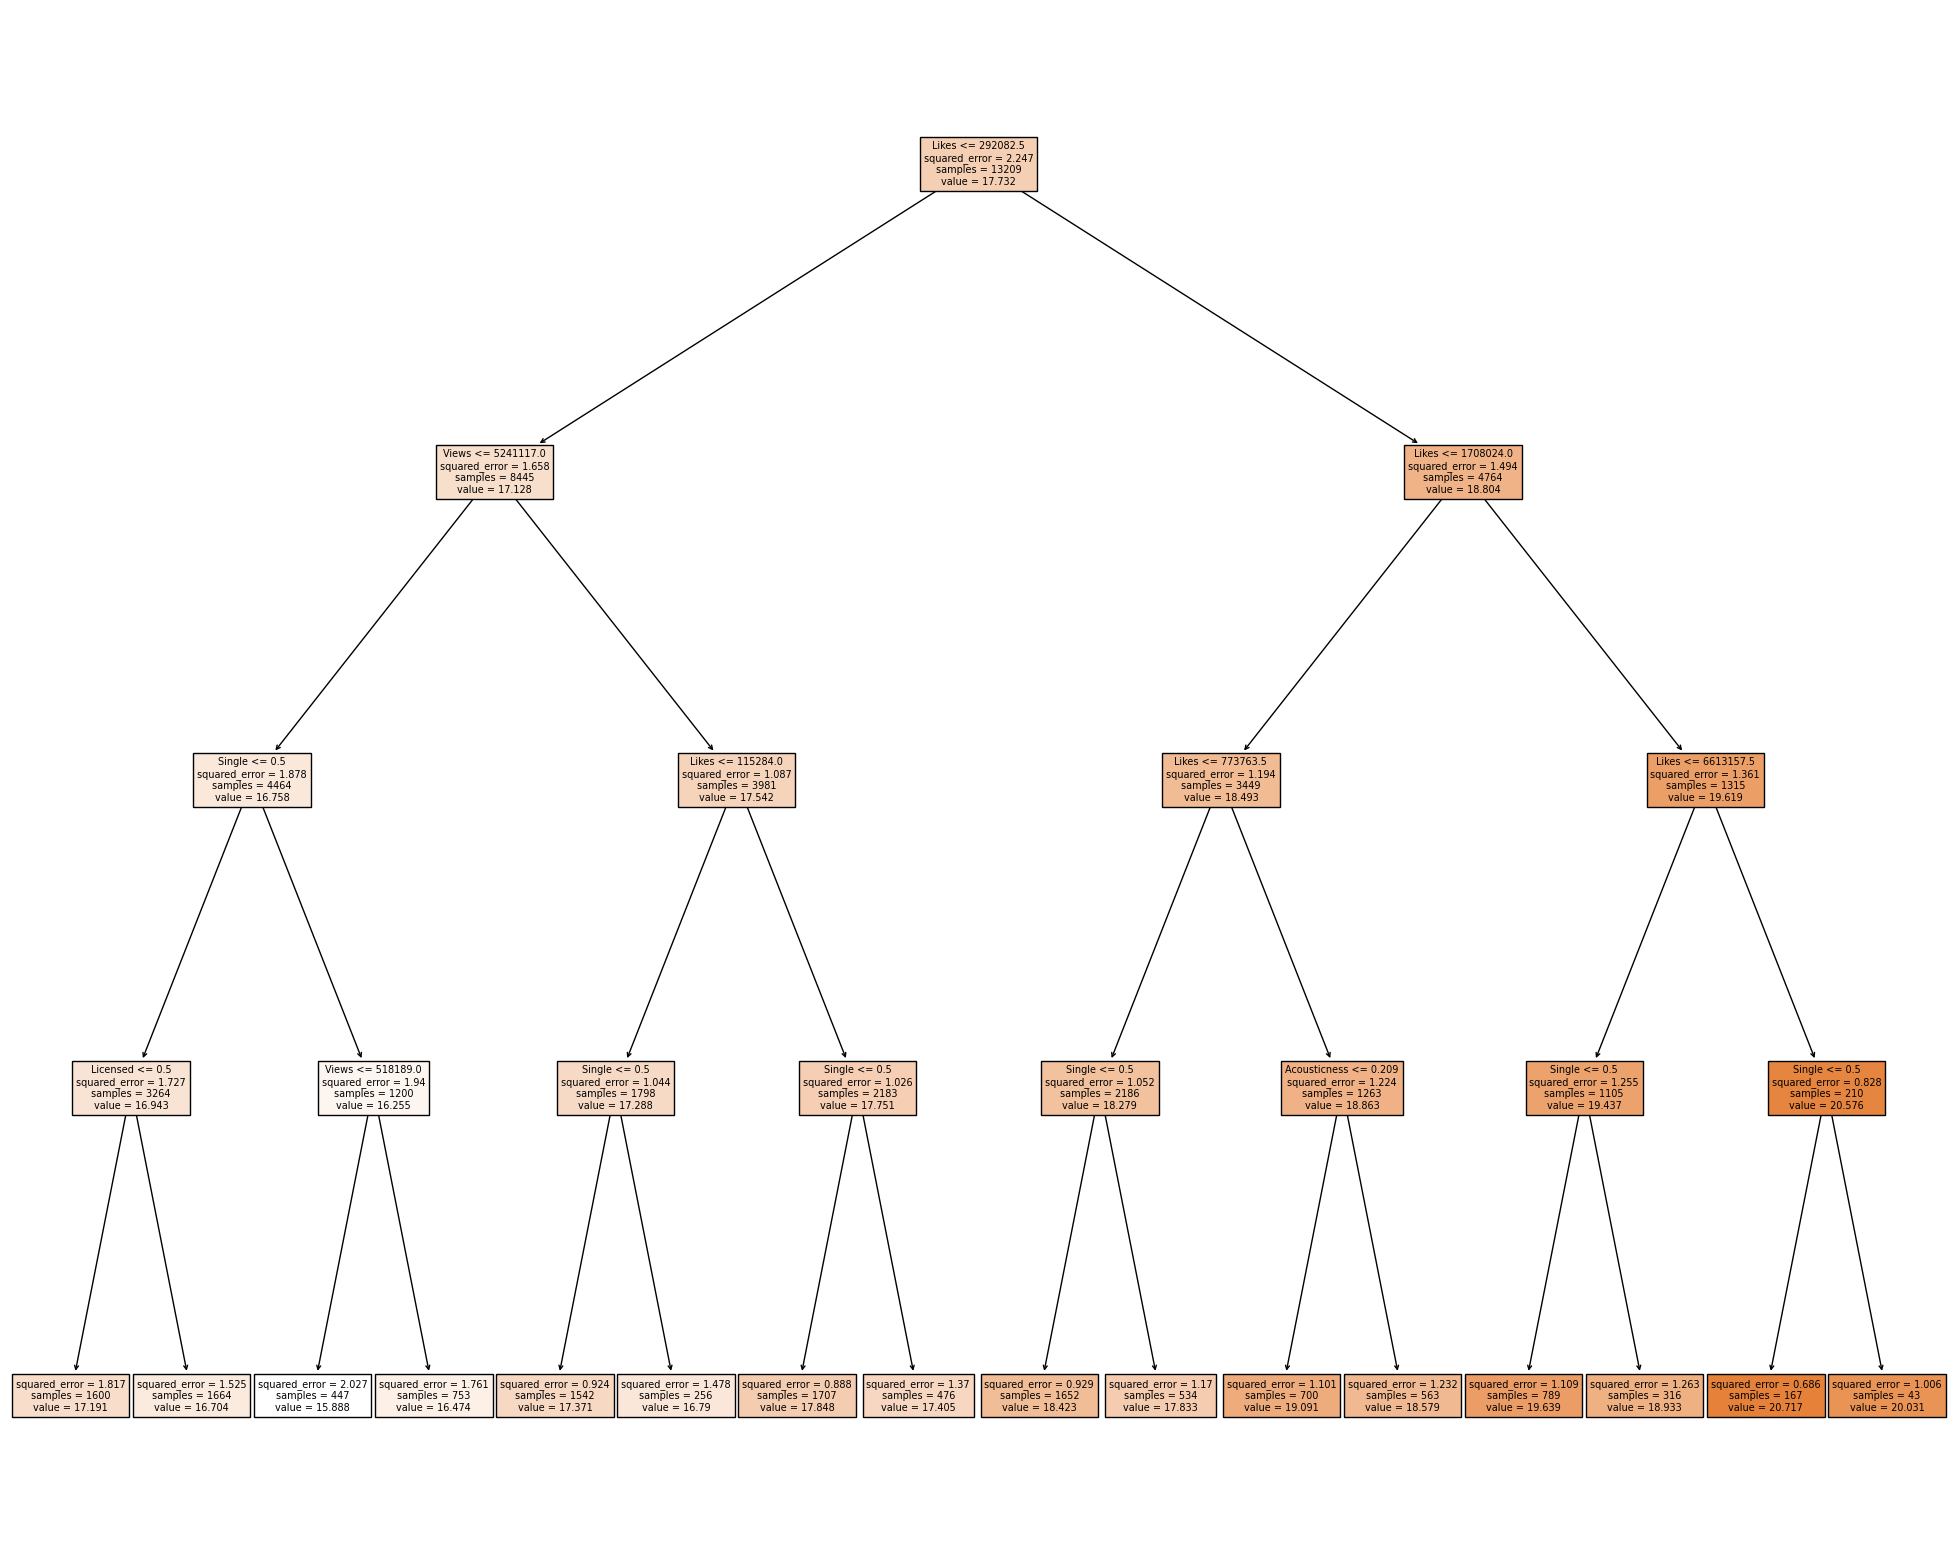

In [46]:
# Plot Decision Tree Model with maxdepth = 4
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(regr_dt, filled=True, feature_names = list(X.columns))

In [47]:
# Decision Tree Evaluation
param_dt = {'max_depth': [2,4,6,8,10,12]}

# Define function and fit the data
grid_dt = DecisionTreeRegressor()
grid_dt_est = GridSearchCV(grid_dt, param_dt, cv=5)

grid_dt_est.fit(X_train1, y_train1)

# Present performance measure, find best hyperparameters, and find best parameter estimates
grid_dt_est.best_params_, grid_dt_est.best_score_, grid_dt_est.cv_results_

({'max_depth': 6},
 0.4385708305979955,
 {'mean_fit_time': array([0.02641368, 0.04785652, 0.07393122, 0.09380493, 0.11565814,
         0.11785355]),
  'std_fit_time': array([0.00845214, 0.00851025, 0.01396084, 0.0179464 , 0.02650526,
         0.01456717]),
  'mean_score_time': array([0.00059829, 0.00333095, 0.00304408, 0.00375309, 0.00313725,
         0.00473533]),
  'std_score_time': array([0.00119658, 0.00525017, 0.00608816, 0.00655058, 0.00627451,
         0.00626914]),
  'param_max_depth': masked_array(data=[2, 4, 6, 8, 10, 12],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 4},
   {'max_depth': 6},
   {'max_depth': 8},
   {'max_depth': 10},
   {'max_depth': 12}],
  'split0_test_score': array([0.36115513, 0.40582691, 0.4245046 , 0.39522289, 0.35090392,
         0.28459305]),
  'split1_test_score': array([0.36172212, 0.42357003, 0.43159477, 0.4213963 , 0.34482923,
 

In [50]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor(max_depth=12, random_state=0)
regr_rf.fit(X_train1, y_train1)
y_pred_train_rf = regr_rf.predict(X_train1)
y_pred_rf = regr_rf.predict(X_test1)
r2_score(y_train1, y_pred_train_rf), r2_score(y_test1, y_pred_rf)

(0.7682910092241217, 0.521697378547513)

In [ ]:
# Random Forest Model Evaluation
param_rf = {'max_depth': [2,4,6,8,10,12,14]} 

# Define function and fit the data
grid_rf = RandomForestRegressor(random_state=0)
grid_rf_est = GridSearchCV(grid_rf, param_rf, cv=5)

grid_rf_est.fit(X_train1, y_train1)

# Present performance measure, find best hyperparameters, and find best parameter estimates
grid_rf_est.best_params_, grid_rf_est.best_score_, grid_rf_est.cv_results_

# max depth of 14 is the best model